# Removing contours from an image using Python and OpenCV

[SOURCE](https://www.pyimagesearch.com/2015/02/09/removing-contours-image-using-python-opencv/)



Awhile back I was going through /r/computervision when I stumbled across a question asking how to remove contours from an image using OpenCV.

Intrigued, I posted a reply. The basic algorithm for removing contours from an image goes something like this:

```
Step 1: Detect and find contours in your image.
Step 2: Loop over contours individually.
Step 3: Determine if the contour is “bad” and should be removed according to some criterion.
Step 4: Accumulate a mask of “bad” contours to be removed.
Step 5: Apply the accumulated mask of bad contours to the original image using a bitwise ‘and’.
```

In [1]:
%matplotlib widget
# SOURCE for this project is: https://www.pyimagesearch.com/2014/11/17/non-maximum-suppression-object-detection-python/
# https://colab.research.google.com/drive/1tdkpKPjUtj_Aq8ponvzd8H4dx1-fSRkv?usp=sharing#scrollTo=Wk5I4XJH5z_x


# Get images from here: https://www.cs.cmu.edu/afs/cs/project/vision/vasc/idb/www/html/face/

In [2]:


# USAGE
# python non-maximum-suppression-case-study.py --image ../images/beach.png
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html

import os
import argparse
import pathlib
from typing import Union, Any

from PIL import Image
from IPython.display import display

import mahotas
import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display
# Import the necessary packages
from matplotlib import pyplot as plt
from skimage.transform import pyramid_gaussian
import better_exceptions
better_exceptions.MAX_LENGTH = None
# better_exceptions.hook()

args = {}

current_folder = pathlib.Path(
    f"/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks")

# # Calculating path to the input data
args["image"] = pathlib.Path(
    f"{current_folder.parent}/images/screenshots/IMG_4725.PNG").resolve()
args["scale"] = 1.5

assert args["image"].exists()

# SOURCE: http://engineering.curalate.com/2017/04/13/content-based-intelligent-cropping.html
def showImage(img):
    temp_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

    # SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
    display(Image.fromarray(temp_image))

image: Union[np.ndarray, Any]
image = cv2.imread(f"{args['image']}")
image = imutils.resize(image, width=500)

def plt_imshow(title, img):
    # convert the image frame BGR to RGB color space and display it
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title)
    plt.grid(False)
    plt.show()

try:
    xrange
except NameError:
    xrange = range



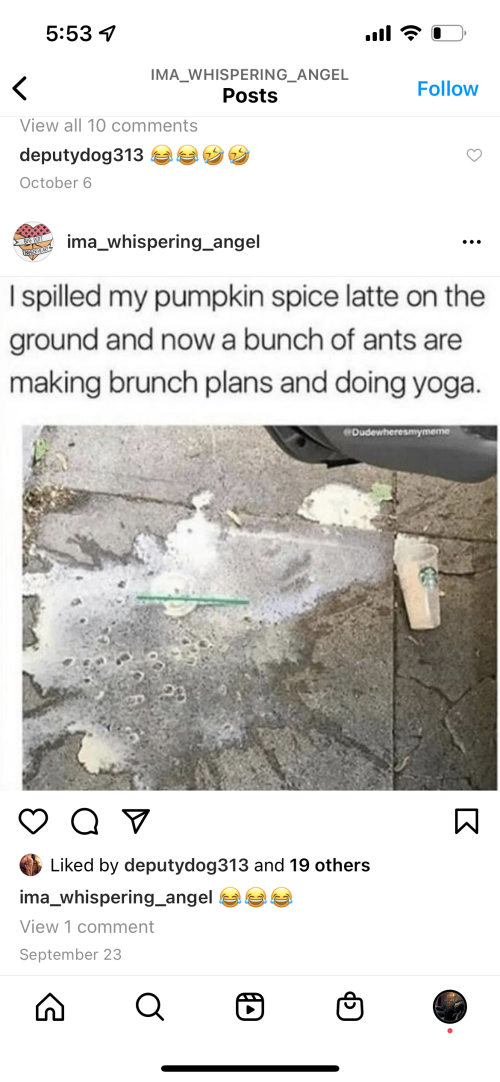

In [3]:
# plt_imshow("Original", image)
showImage(image)

In [4]:
# 	cv.arcLength(	curve, closed	) ->	retval
# SOURCE: https://docs.opencv.org/4.5.3/d3/dc0/group__imgproc__shape.html#ga8d26483c636be6b35c3ec6335798a47c

In [33]:
# Removing contours from an image using Python and OpenCV
# remove_contours.py
# NOTE: Remember, in our toy example image above, our goal is to remove the circles/ellipses, while keeping the rectangles intact.
def is_contour_bad(contour):
    # ------------------------
    # approximate the contour
    # NOTE: Contour Perimeter (https://docs.opencv.org/4.5.3/dd/d49/tutorial_py_contour_features.html)
    # It is also called arc length. 
    # It can be found out using cv.arcLength() function. 
    # Second argument specify whether shape is a closed contour (if passed True), or just a curve.
    contour_perimeter: float
    contour_perimeter = cv2.arcLength(contour, True)
    # ------------------------
    
    # ------------------------
    # 4. Contour Approximation
    # It approximates a contour shape to another shape with less 
    # number of vertices depending upon the precision we specify. 
    # It is an implementation of Douglas-Peucker algorithm. 
    # Check the wikipedia page for algorithm and demonstration.
    # To understand this, 
    # suppose you are trying to find a square in an image, 
    # but due to some problems in the image, 
    # you didn't get a perfect square, 
    # but a "bad shape" (As shown in first image below). 
    # Now you can use this function to approximate the shape. 
    # In this, second argument is called epsilon, 
    # which is maximum distance from contour to approximated contour. 
    # It is an accuracy parameter. 
    # A wise selection of epsilon is needed to get the correct output.
    approx: np.ndarray
    epsilon = 0.02 * contour_perimeter
    approx = cv2.approxPolyDP(contour, epsilon, True)
    # ------------------------
    # the contour is 'bad' if it is not a rectangle
    # 4 represents the number of points, or vertices in the contour
    return not len(approx) == 4


In [36]:
# load the shapes image, convert it to grayscale, and edge edges in
# the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# When performing Canny edge detection we need two values
# for hysteresis: threshold1 and threshold2. Any gradient
# value larger than threshold2 are considered to be an
# edge. Any value below threshold1 are considered not to
# ben an edge. Values in between threshold1 and threshold2
# are either classified as edges or non-edges based on how
# the intensities are "connected". In this case, any gradient
# values below 30 are considered non-edges whereas any value
# above 150 are considered edges.
edged = cv2.Canny(gray, 50, 100)

# find contours in the image and initialize the mask that will be
# used to remove the bad contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
mask = np.ones(image.shape[:2], dtype="uint8") * 255

# loop over the contours
for c in cnts:
    # if the contour is bad, draw it on the mask
    if is_contour_bad(c):
        cv2.drawContours(mask, [c], -1, 0, -1)

# remove the contours from the image and show the resulting images
result_image = cv2.bitwise_and(image, image, mask=mask)

edged - show all the edges of of the image


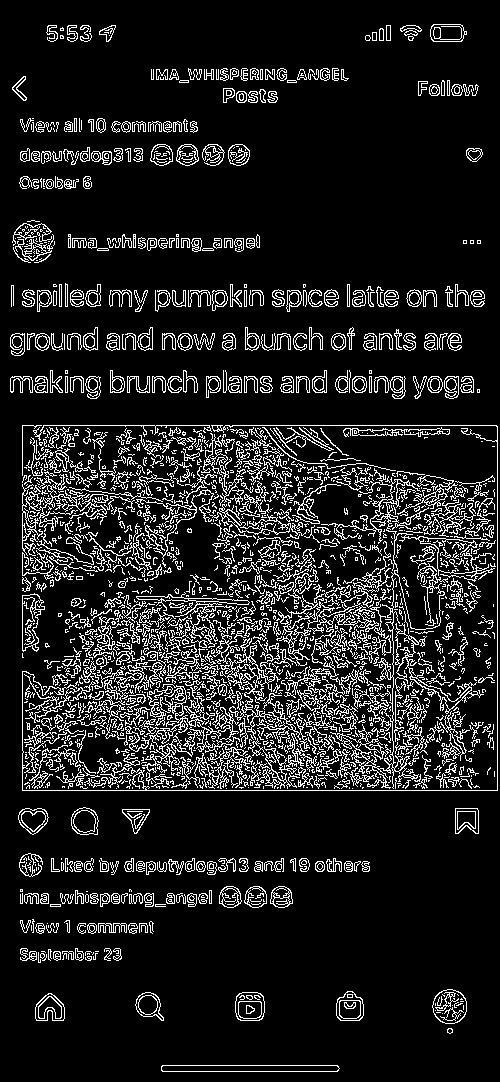

In [39]:
print("edged - show all the edges of of the image")
showImage(edged)

mask


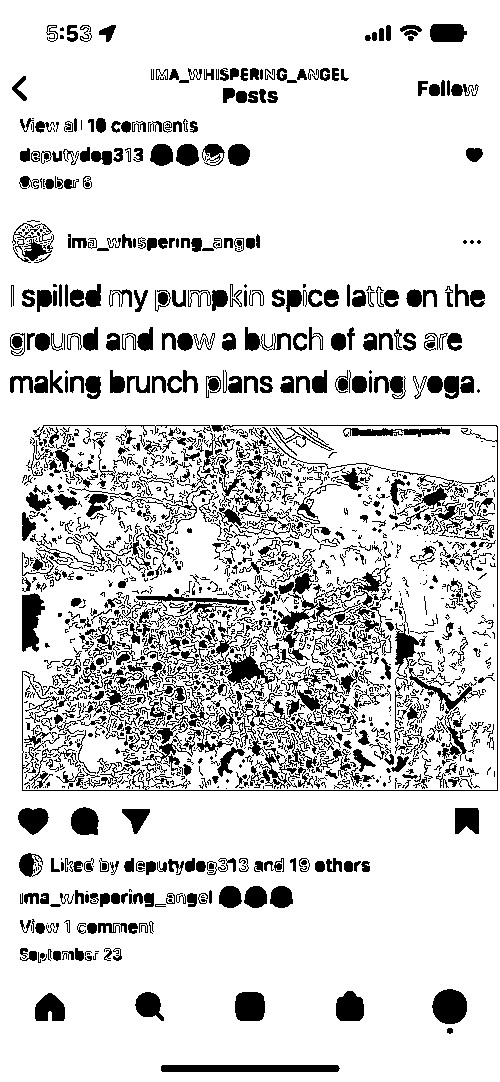

In [42]:
# plt_imshow("Mask", mask)
# plt_imshow("After", result_image)

print("mask")
showImage(mask)

after


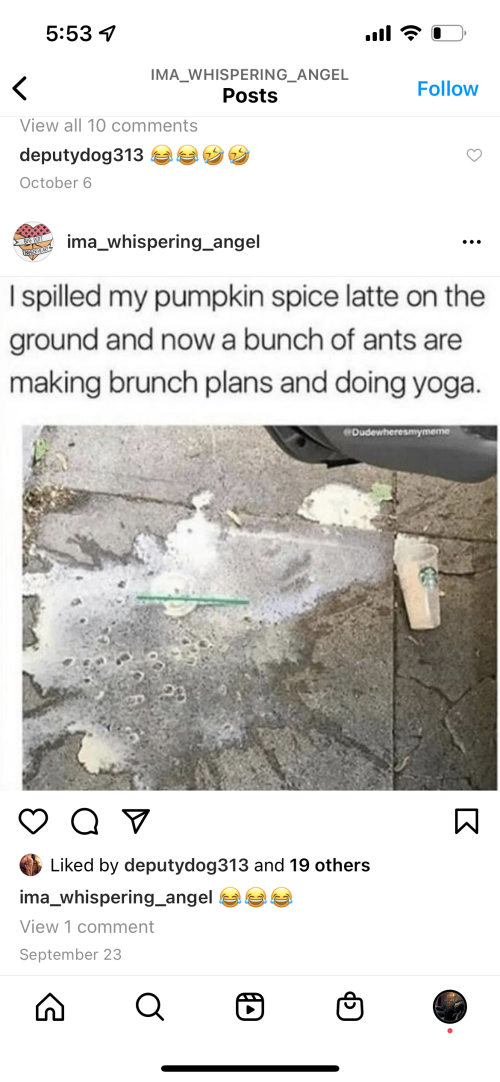

In [45]:
print("after")
showImage(image)

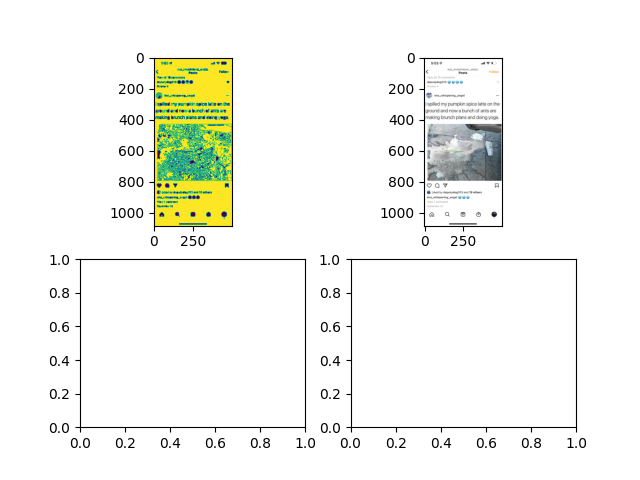

In [48]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(mask)
axarr[0,1].imshow(image)
# axarr[1,0].imshow(image_datas[2])
# axarr[1,1].imshow(image_datas[3])